# Fouriertransformation

## Generering af signal

### Bølger
Tre bølger med forskellige frekvenser genereres.

In [13]:
from IPython.display import display, Latex
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
initial_time = datetime.now()
sns.set()

In [14]:
t = np.arange(0, 2, 0.001)
waves = []

# Wave 1
f = 3
wave = np.sin(t*f*2*np.pi + np.pi/2)
waves.append([f, wave])


#Wave 2
f = 2
wave = np.cos(t*f*2*np.pi)
waves.append([f, wave])
"""
#Wave 3
f = 8
wave = np.sin(t*f*2*np.pi)
waves.append([f, wave])
"""

'\n#Wave 3\nf = 8\nwave = np.sin(t*f*2*np.pi)\nwaves.append([f, wave])\n'

### Blandet signal
De tre bølger lægges sammen, og det samlede signal dannes.

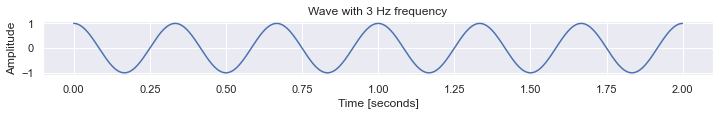

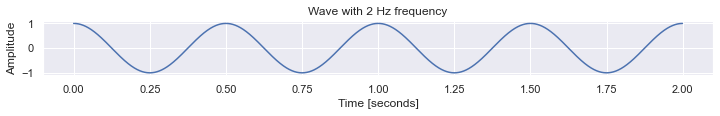

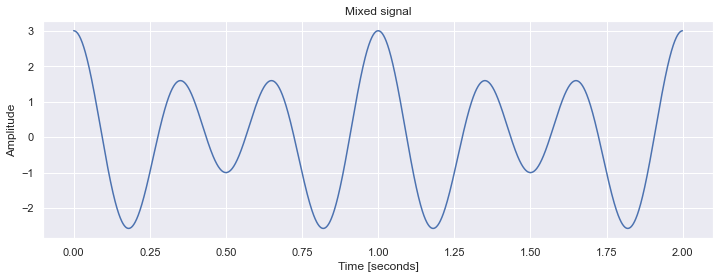

In [15]:
signal = waves[0][1]
plt.rcParams["figure.figsize"] = (12, 1)
for wave in waves:
    signal = np.add(signal, wave[1])
    plt.plot(t, wave[1])
    plt.title("Wave with {} Hz frequency".format(wave[0]))
    plt.xlabel("Time [seconds]")
    plt.ylabel("Amplitude")
    plt.show()
    
plt.rcParams["figure.figsize"] = (12, 4)
plt.plot(t, signal)
plt.title("Mixed signal")
plt.xlabel("Time [seconds]")
plt.ylabel("Amplitude")
plt.show()

## Inputsignalet vrides rundt
Samplingsfrekvenser fra 0 til 10 Hz. Hvis signalet havde haft en masse, ville massemidtpunktet være den røde prik.

In [16]:
r_cord = []
min_freq_range = 0.0
max_freq_range = 10.0

sf_list = np.arange(min_freq_range, max_freq_range, 0.05)
for sf in sf_list:
    r_cord.append([(signal[i], t[i]*sf*2*np.pi) for i in range(len(t))])

In [17]:
x_cord, y_cord = [], []
for l in range(len(r_cord)):
    x_cord.append( [amp * np.cos(theta) for (amp, theta) in r_cord[l]] )
    y_cord.append( [amp * np.sin(theta) for (amp, theta) in r_cord[l]] )    

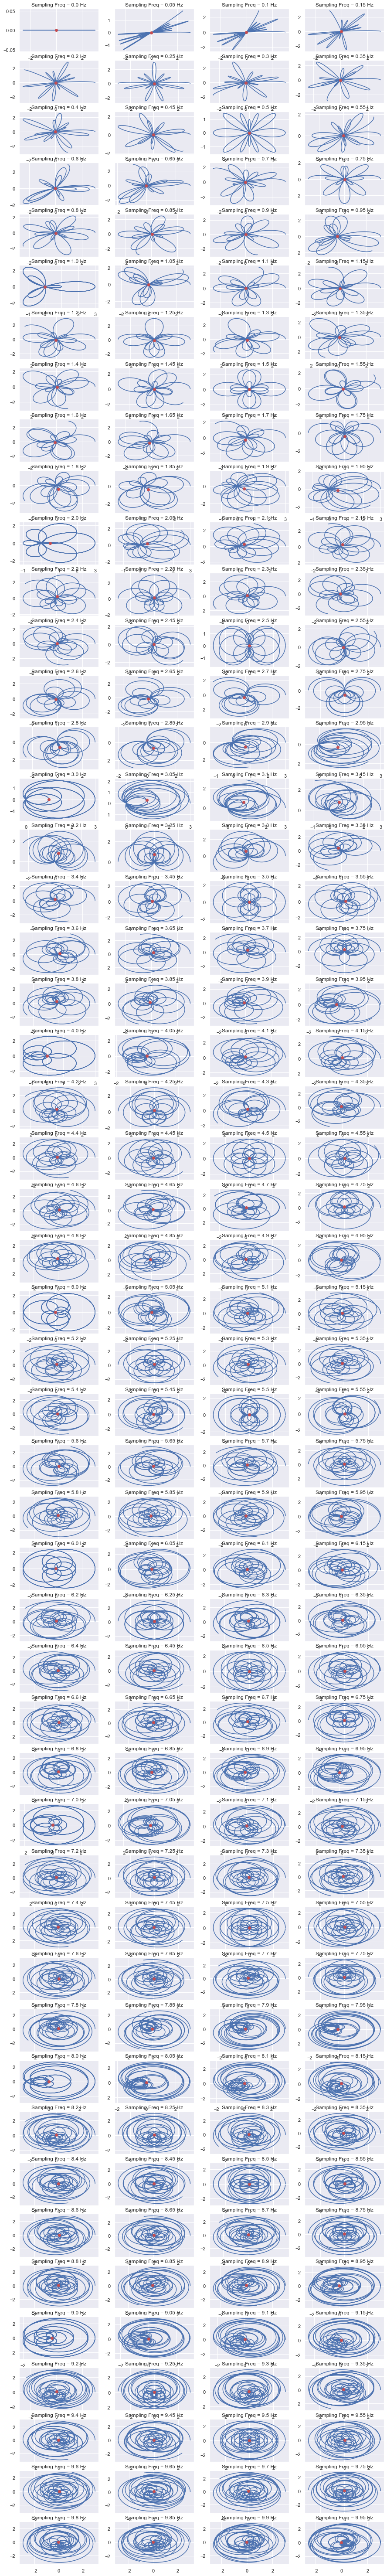

In [21]:
x_mean_list = []
y_mean_list = []
amp_list = []
phase_list = []

plt.rcParams["figure.figsize"] = (15,110)
for l in range(len(r_cord)):
    plt.subplot(int(len(r_cord)/4)+1, 4, int(l+1))
    plt.plot(x_cord[l], y_cord[l])
    plt.plot(np.mean(x_cord[l]), np.mean(y_cord[l]), 'or' )
    plt.title("Sampling Freq = "+str(round(sf_list[l], 2))+" Hz")
    
    # Storing the COM for plotting later
    x_mean = np.sum(x_cord[l])
    y_mean = np.sum(y_cord[l])
    x_mean_list.append(x_mean)
    y_mean_list.append(y_mean)
    amp_list.append(np.sqrt(x_mean**2 + y_mean**2))
    if x_mean == 0:
        phase_list.append(0)
    else:
        phase_list.append(np.arctan(y_mean/x_mean))

Massemidtpunkternes afstand fra origo for hver samplingsfrekvens plottes. Ved store udsving, er der en regelmæssig sinuskurve.

61
3.0500000000000003: 2040.0974392587611, 0.3137048502917443


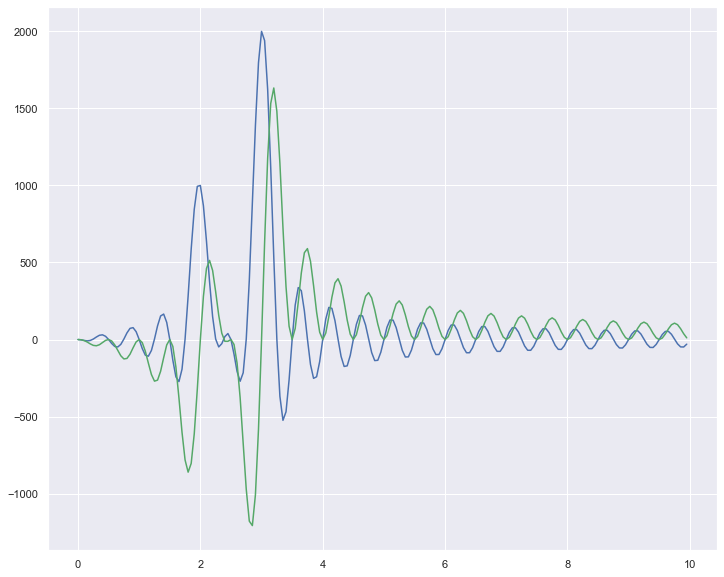

In [19]:
plt.rcParams["figure.figsize"] = (12,10)
plt.plot(sf_list, x_mean_list)
plt.plot(sf_list, y_mean_list, "C2")
#plt.plot(sf_list, np.add(x_mean_list, y_mean_list))
#plt.plot(sf_list, amp_list)
#plt.plot(sf_list, phase_list)

max_val = np.argmax(amp_list)
print(max_val)
print("{}: {}, {}".format(sf_list[max_val], amp_list[max_val], phase_list[max_val]))
plt.show()

Støj filtreres fra, så frekvenserne for inputbølgerne tydeligt ses.

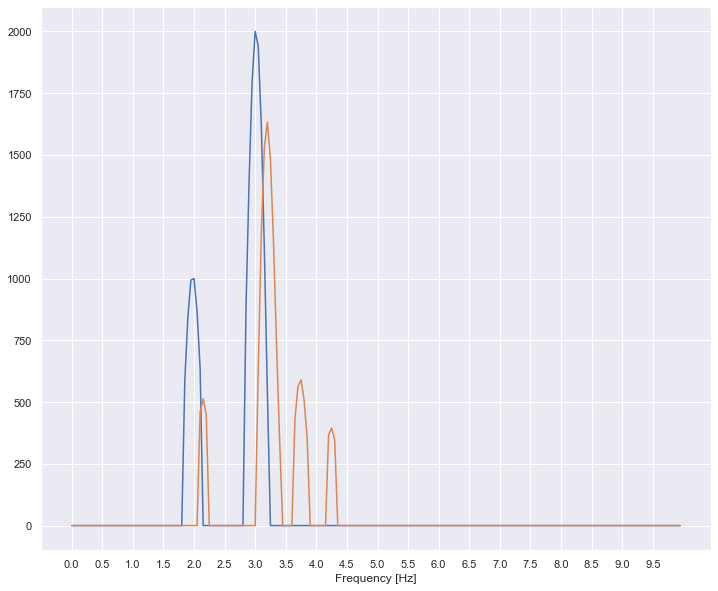

Delta tid: 0:00:03.793517


In [20]:
x_smoothed = [i if i>0 and i>0.2*max(x_mean_list) else 0 for i in x_mean_list]
y_smoothed = [i if i>0 and i>0.2*max(y_mean_list) else 0 for i in y_mean_list]
pyth = [np.sqrt(x_mean_list[i]**2 + y_mean_list[i]**2) for i in range(len(x_mean_list))]
"""print(max(x_smoothed))
print(max(y_smoothed))
print(max(y_smoothed) - max(x_smoothed))
shift = np.arctan2(max(y_smoothed), max(x_smoothed))
print(shift/2*np.pi)
"""
plt.rcParams["figure.figsize"] = (12,10)
plt.plot(sf_list, x_smoothed)
plt.plot(sf_list, y_smoothed)
# plt.plot(sf_list, pyth)
plt.xlabel("Frequency [Hz]")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
plt.show()

print("Delta tid: {}".format(datetime.now() - initial_time))